In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from api_key import api_key
from pprint import pprint

In [2]:
columns_years=['2013-03','2013-06','2013-09','2014-03','2014-06','2014-09','2015-03','2015-06','2015-09','2016-03','2016-06','2016-09','2016-12','2017-03','2017-06','2017-09','2017-12','2018-03','2018-06','2018-09']
columns_Region_Year=['RegionName','2013-03','2013-06','2013-09','2014-03','2014-06','2014-09','2015-03','2015-06','2015-09','2016-03','2016-06','2016-09','2016-12','2017-03','2017-06','2017-09','2017-12','2018-03','2018-06','2018-09']

In [3]:
#Analysis on Austins affordability - Median house value 
chartinfo = 'Austin Quartely Median Income from 2016'
infosize = 10
austin_affordability = pd.read_csv('Affordability_Income.csv', encoding='latin-1')
AustinMedianIncome = austin_affordability[austin_affordability['RegionName']=="Austin, TX"]
AustinMedianIncome

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
35,394355,"Austin, TX",35,15231.49,15511.86,15875.19,16336.93,16854.44,17264.82,17602.44,...,70512.24,71526.15,72435.07,72903.852594,73372.635187,73841.417781,74310.200375,74778.982969,75247.765562,75716.548156


In [4]:
#importing austin_affordability file 
#df_AustinMedianIncome= pd.DataFrame(AustinMedianIncome, columns=columns_Region_Year)
#df_AustinMedianIncome
df_AustinMedianIncome= pd.DataFrame(AustinMedianIncome.loc[:,'2013-03'::])
df_AustinMedianIncome

,2013-03,2013-06,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
35,61192.85,61722.4,61574.53,61888.74,62657.83,63625.29,64792.6,65651.42,66331.92,66712.46,...,70512.24,71526.15,72435.07,72903.852594,73372.635187,73841.417781,74310.200375,74778.982969,75247.765562,75716.548156


In [5]:
df_AustinMedianIncome=pd.DataFrame(AustinMedianIncome, columns=columns_years)
df_AustinMedianIncome = df_AustinMedianIncome.transpose().reset_index().rename(columns={'index':'Variable'})
df_AustinMedianIncome.columns = ['year','income']
df_AustinMedianIncome


,year,income
0,2013-03,61192.850000
1,2013-06,61722.400000
2,2013-09,61574.530000
3,2014-03,62657.830000
4,2014-06,63625.290000
5,2014-09,64792.600000
6,2015-03,66331.920000
7,2015-06,66712.460000
8,2015-09,67443.320000
9,2016-03,69529.540000


In [6]:
NationalMedianIncome = pd.read_csv('Affordability_Income.csv', encoding='latin-1')
NationalMedianIncome = NationalMedianIncome.loc[(NationalMedianIncome["RegionName"] == "United States")]
NationalMedianIncome.drop(
    labels=['RegionID',
            'RegionName',
            'SizeRank'],
    axis='columns',
    inplace=True
)
NationalMedianIncome.dropna(inplace=True)
df_National_Median_Income= pd.DataFrame(NationalMedianIncome, columns=columns_years)
df_National_Median_Income

df_National_Median_Income = df_National_Median_Income.transpose().reset_index().rename(columns={'index':'Variable'})
df_National_Median_Income.columns = ['year','income']
df_National_Median_Income

#df_National_Median_Income_mean = pd.DataFrame(df_National_Median_Income.mean())
#df_National_Median_Income_mean
#df_National_Median_Income_mean.columns=['National_Mean_price']

#yaxis_NationalMedianIncome=df_National_Median_Income_mean

,year,income
0,2013-03,52244.570000
1,2013-06,52371.660000
2,2013-09,52055.650000
3,2014-03,52771.680000
4,2014-06,53340.510000
5,2014-09,53983.380000
6,2015-03,55010.420000
7,2015-06,55485.000000
8,2015-09,55977.250000
9,2016-03,57002.410000


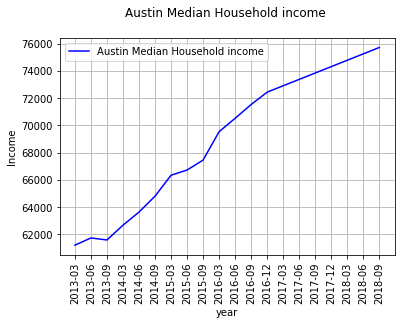

In [21]:
x_axis = np.arange(0, len(df_AustinMedianIncome['year']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)
plt.xticks(tick_loc, df_AustinMedianIncome['year'], rotation=90)   
#plt.plot(x_axis, df_National_Median_Income['income'], color="red", label="National Median Household income")
plt.plot(x_axis, df_AustinMedianIncome['income'],color="Blue", label="Austin Median Household income")
plt.xlabel('year')
plt.ylabel('Income')
#plt.title('Austin Median Household income V/S National Household income \n')
plt.title('Austin Median Household income \n')

plt.grid()
plt.legend(loc='best')
plt.savefig('scatterplot.png', dpi=100)
plt.show()


In [8]:
chartinfo = 'Austin Sale Price for homes from 2013'
infosize = 10
austin_saleprice = pd.read_csv('Sale_Prices_City.csv', encoding='latin-1')
Austin_SalePrice = austin_saleprice[austin_saleprice['RegionName']=="Austin"]
Austin_SalePrice = Austin_SalePrice[Austin_SalePrice['StateName']=="Texas"]
Austin_SalePrice

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
9,10221.0,Austin,Texas,10,NaN,NaN,NaN,NaN,NaN,NaN,...,342500.0,341000.0,347800.0,350100.0,344200.0,341300.0,344100.0,349500.0,358700.0,NaN


In [9]:
df= pd.DataFrame(Austin_SalePrice, columns=columns_Region_Year)
df
cols=columns_years
df

,RegionName,2013-03,2013-06,2013-09,2014-03,2014-06,2014-09,2015-03,2015-06,2015-09,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
9,Austin,NaN,NaN,NaN,NaN,260000.0,269800.0,278300.0,295500.0,285900.0,...,305500.0,314900.0,315500.0,317100.0,330100.0,327100.0,341600.0,347800.0,341300.0,358700.0


In [10]:
df_Austin_SalePrice =pd.DataFrame(Austin_SalePrice, columns=columns_years)
df_Austin_SalePrice = df_Austin_SalePrice.transpose().reset_index().rename(columns={'index':'Variable'})
df_Austin_SalePrice.columns = ['year','SalePrice']
df_Austin_SalePrice

,year,SalePrice
0,2013-03,NaN
1,2013-06,NaN
2,2013-09,NaN
3,2014-03,NaN
4,2014-06,260000.0
5,2014-09,269800.0
6,2015-03,278300.0
7,2015-06,295500.0
8,2015-09,285900.0
9,2016-03,302800.0


In [11]:
df_prop_val = pd.read_csv('Sale_Prices_City.csv')


df_aus_prop_val = df_prop_val.loc[
    (df_prop_val["RegionName"] == "Austin") & 
    (df_prop_val["StateName"] == "Texas"), :
]


df_aus_prop_val
df_prop_val.drop(
    labels=['RegionID',
            'RegionName',
            'StateName',
            'SizeRank'],
    axis='columns',
    inplace=True
)
df_prop_val.dropna(inplace=True)
df1= pd.DataFrame(df_prop_val, columns=columns_years)

df1

natl_avg_prop_val = pd.DataFrame(df1.mean())

natl_avg_prop_val.columns=['National_Mean_price']


y_aus_notax=natl_avg_prop_val['National_Mean_price']
natl_avg_prop_val
df

#df_prop_val is your main dataframe, 
#loaded with the csv of sales prices
#natl_avg_prop_val is the dataframe with the median
# sales prices for homes across the nation

,RegionName,2013-03,2013-06,2013-09,2014-03,2014-06,2014-09,2015-03,2015-06,2015-09,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
9,Austin,NaN,NaN,NaN,NaN,260000.0,269800.0,278300.0,295500.0,285900.0,...,305500.0,314900.0,315500.0,317100.0,330100.0,327100.0,341600.0,347800.0,341300.0,358700.0


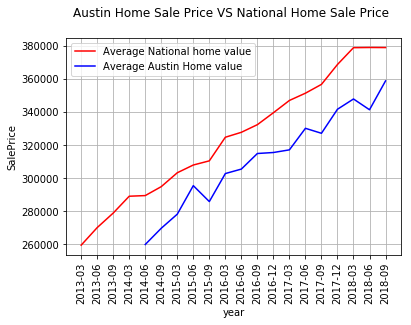

In [25]:
x_axis = np.arange(0, len(df_Austin_SalePrice['year']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)
plt.xticks(tick_loc, df_Austin_SalePrice['year'], rotation=90)    
plt.plot(x_axis, y_aus_notax, color="red", label="Average National home value")
plt.plot(x_axis, df_Austin_SalePrice['SalePrice'],color="blue", label="Average Austin Home value")
plt.xlabel('year')
plt.ylabel('SalePrice')
plt.title('Austin Home Sale Price VS National Home Sale Price \n')
plt.grid()
plt.legend(loc='best')
plt.savefig('homeprice.png', bbox_inches='tight')

plt.show()